In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Read data from CSV files

In [3]:
df = pd.read_csv('train.csv')

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Exploratory Data Analysis

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
df = df.dropna(subset=['Embarked'])

In [ ]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24',

In [ ]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '36973', '347088', 'PC 17605', '2661', 'C.A. 29395',
       'S.P. 3464', '3101281', '315151', 'C.A. 33111', 'S.O.C. 14879',
       '2680', '1601', '348123', '349208', '374746', '248738', '364516',
       '345767', '345779', '330932', '113059', 'SO/C 14885', '3101278',
       'W./C

In [5]:
df = df.drop(columns=["Cabin", "Name", "Ticket"], axis=1)

In [ ]:
df.sample(n=10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
398,399,0,2,male,23.0,0,0,10.5000,S
363,364,0,3,male,35.0,0,0,7.0500,S
883,884,0,2,male,28.0,0,0,10.5000,S
475,476,0,1,male,NaN,0,0,52.0000,S
610,611,0,3,female,39.0,1,5,31.2750,S
314,315,0,2,male,43.0,1,1,26.2500,S
638,639,0,3,female,41.0,0,5,39.6875,S
498,499,0,1,female,25.0,1,2,151.5500,S
334,335,1,1,female,NaN,1,0,133.6500,S
726,727,1,2,female,30.0,3,0,21.0000,S


In [6]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

## Data Visualization

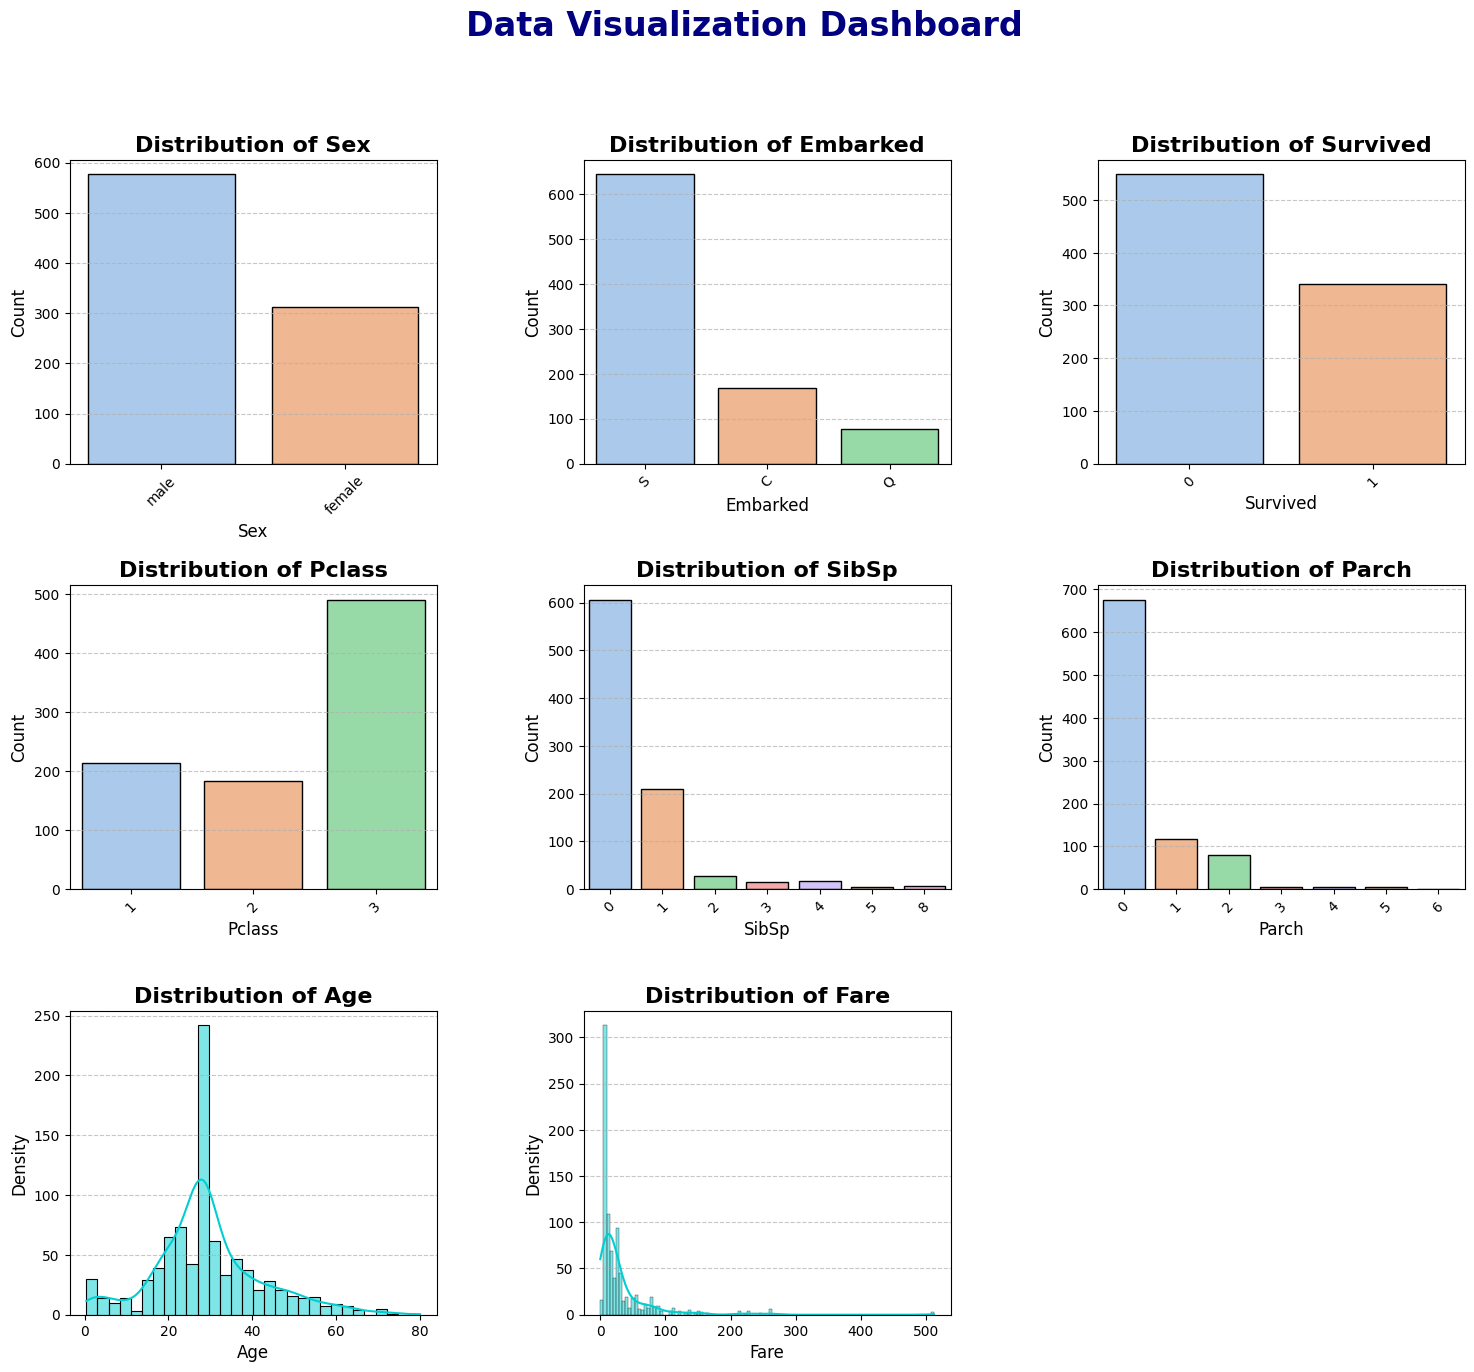

In [ ]:
import math

cat_cols = [col for col in df.columns if df[col].dtype == 'object'] + ['Survived', 'Pclass', 'SibSp', 'Parch']
num_cols = ['Age', 'Fare']

total_plots = len(cat_cols) + len(num_cols)
cols = 3
rows = math.ceil(total_plots / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, rows * 5))

plt.subplots_adjust(hspace=0.4, wspace=0.4)

fig.suptitle('Data Visualization Dashboard', fontsize=24, fontweight='bold', color='navy')

# Flatten axes array
axes = axes.flatten()

# Plotting categorical columns
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette='pastel', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}', fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Plotting numerical columns
for i, col in enumerate(num_cols, start=len(cat_cols)):
    sns.histplot(df[col], kde=True, ax=axes[i], color='darkturquoise', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}', fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide any unused subplots
for j in range(total_plots, len(axes)):
    fig.delaxes(axes[j])

plt.show()

## CatBoost

In [7]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.6 MB/s eta 0:00:00


In [30]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

In [ ]:
X

array([[3, 'male', 22.0, ..., 0, 7.25, 'S'],
       [1, 'female', 38.0, ..., 0, 71.2833, 'C'],
       [3, 'female', 26.0, ..., 0, 7.925, 'S'],
       ...,
       [3, 'female', 28.0, ..., 2, 23.45, 'S'],
       [1, 'male', 26.0, ..., 0, 30.0, 'C'],
       [3, 'male', 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [ ]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 18)

### Train the model

In [35]:
import catboost as cb

cat_features = [0,1,3,4,6]
model = cb.CatBoostClassifier(cat_features=cat_features, verbose=100)

In [36]:
model.fit(X_train, y_train)

Learning rate set to 0.008906
0:	learn: 0.6898804	total: 2.58ms	remaining: 2.58s
100:	learn: 0.4555957	total: 428ms	remaining: 3.81s
200:	learn: 0.4043238	total: 813ms	remaining: 3.23s
300:	learn: 0.3815316	total: 1.17s	remaining: 2.73s
400:	learn: 0.3681645	total: 1.54s	remaining: 2.3s
500:	learn: 0.3562814	total: 1.91s	remaining: 1.9s
600:	learn: 0.3456851	total: 2.3s	remaining: 1.53s
700:	learn: 0.3366868	total: 3.02s	remaining: 1.29s
800:	learn: 0.3290821	total: 3.79s	remaining: 941ms
900:	learn: 0.3210280	total: 4.52s	remaining: 497ms
999:	learn: 0.3123524	total: 5.35s	remaining: 0us


In [37]:
y_pred = model.predict(X_test)

## Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[102,   7],
       [ 21,  48]])

## The four metrics

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8426966292134831

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.85
Recall: 0.7391304347826086
F1 Score: 0.7906976744186046


In [13]:
params = model.get_all_params()
params

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorder

## K-Fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model,
                             X = X,
                             y = y,
                             scoring = 'accuracy',
                             cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

0:	learn: 0.6897589	total: 20.2ms	remaining: 20.1s
100:	learn: 0.4827345	total: 1.52s	remaining: 13.6s
200:	learn: 0.3993478	total: 3.06s	remaining: 12.1s
300:	learn: 0.3544422	total: 4.69s	remaining: 10.9s
400:	learn: 0.3238819	total: 6.28s	remaining: 9.38s
500:	learn: 0.3020242	total: 7.89s	remaining: 7.86s
600:	learn: 0.2868804	total: 9.88s	remaining: 6.56s
700:	learn: 0.2773817	total: 12.9s	remaining: 5.52s
800:	learn: 0.2705287	total: 14.6s	remaining: 3.62s
900:	learn: 0.2652548	total: 16.2s	remaining: 1.78s
999:	learn: 0.2604447	total: 17.7s	remaining: 0us
0:	learn: 0.6897315	total: 15.3ms	remaining: 15.3s
100:	learn: 0.4886118	total: 1.51s	remaining: 13.4s
200:	learn: 0.4083139	total: 3.12s	remaining: 12.4s
300:	learn: 0.3643598	total: 4.7s	remaining: 10.9s
400:	learn: 0.3352506	total: 7.74s	remaining: 11.6s
500:	learn: 0.3163122	total: 9.59s	remaining: 9.55s
600:	learn: 0.3021709	total: 11.3s	remaining: 7.47s
700:	learn: 0.2930139	total: 12.8s	remaining: 5.48s
800:	learn: 0.286

## Grid Search

In [14]:
from sklearn.model_selection import GridSearchCV
parameters = [{'learning_rate': [0.001,0.005,0.01], 'depth': [4,7,10,12], 'l2_leaf_reg': [2,6,10,12], 'random_strength': [0,5,10,12]}]
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search.fit(X, y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Streaming output truncated to the last 5000 lines.
700:	learn: 0.5359385	total: 14.3s	remaining: 6.09s
800:	learn: 0.5226486	total: 15.7s	remaining: 3.9s
900:	learn: 0.5116234	total: 17.4s	remaining: 1.91s
999:	learn: 0.5021906	total: 19.7s	remaining: 0us
0:	learn: 0.6929227	total: 7.48ms	remaining: 7.47s
100:	learn: 0.6601566	total: 1.98s	remaining: 17.6s
200:	learn: 0.6379037	total: 2.89s	remaining: 11.5s
300:	learn: 0.6149470	total: 4.3s	remaining: 9.99s
400:	learn: 0.5937268	total: 5.62s	remaining: 8.4s
500:	learn: 0.5732942	total: 6.99s	remaining: 6.96s
600:	learn: 0.5560871	total: 8.41s	remaining: 5.59s
700:	learn: 0.5419391	total: 9.51s	remaining: 4.06s
800:	learn: 0.5297669	total: 10.6s	remaining: 2.64s
900:	learn: 0.5165807	total: 12.5s	remaining: 1.37s
999:	learn: 0.5067003	total: 15s	remaining: 0us
0:	learn: 0.6929367	total: 3.4ms	remaining: 3.4s
100:	learn: 0.6642505	total: 1.1s	remaining: 9.76s
200:	learn: 0.6373019	total: 2.38s	remaining: 9.46s
300:	learn: 0.6132393	total

## Bayesian Optimization

In [12]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.7 MB/s eta 0:00:00


In [13]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

param_space = {
    'learning_rate': Real(0.0001, 0.1, prior='log-uniform'),
    'depth': Integer(4, 12),
    'l2_leaf_reg': Integer(2, 15),
    'random_strength': Integer(0, 15),
    'iterations': Integer(100, 500),
    'bagging_temperature': Real(0, 1),
    'border_count': Integer(32, 100),
    'colsample_bylevel': Real(0.5, 1.0)
}

opt = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=50,
    scoring='accuracy',
    cv=10,
    n_jobs=-1,
    random_state=18
)

opt.fit(X, y)

best_accuracy = opt.best_score_
best_parameters = opt.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy * 100))
print("Best Parameters:", best_parameters)

0:	learn: 0.6594267	total: 1.27ms	remaining: 137ms
100:	learn: 0.2332421	total: 1.14s	remaining: 90.5ms
108:	learn: 0.2263168	total: 1.23s	remaining: 0us
Best Accuracy: 83.80 %
Best Parameters: OrderedDict([('bagging_temperature', 0.32178849460818004), ('border_count', 32), ('colsample_bylevel', 0.761665996093313), ('depth', 12), ('iterations', 109), ('l2_leaf_reg', 2), ('learning_rate', 0.1), ('random_strength', 0)])


## Choose either

In [13]:
model = cb.CatBoostClassifier(cat_features=cat_features, verbose=100, depth=12, l2_leaf_reg=6, learning_rate=0.01, random_strength=0)
model.fit(X_train, y_train)

0:	learn: 0.6865407	total: 177ms	remaining: 2m 56s
100:	learn: 0.3855483	total: 17.6s	remaining: 2m 36s
200:	learn: 0.2999663	total: 32.7s	remaining: 2m 9s
300:	learn: 0.2550661	total: 39.5s	remaining: 1m 31s
400:	learn: 0.2336845	total: 46s	remaining: 1m 8s
500:	learn: 0.2223577	total: 56.4s	remaining: 56.2s
600:	learn: 0.2109082	total: 1m 3s	remaining: 42s
700:	learn: 0.1999168	total: 1m 8s	remaining: 29.3s
800:	learn: 0.1874225	total: 1m 15s	remaining: 18.9s
900:	learn: 0.1772217	total: 1m 21s	remaining: 8.97s
999:	learn: 0.1668479	total: 1m 28s	remaining: 0us


In [45]:
model = cb.CatBoostClassifier(cat_features=cat_features, verbose=100, bagging_temperature=0.32178849460818004, border_count=32, colsample_bylevel=0.761665996093313, depth=12, iterations=109, l2_leaf_reg=2, learning_rate=0.1, random_strength=0)
model.fit(X_train, y_train)

0:	learn: 0.6616783	total: 38.8ms	remaining: 4.19s
100:	learn: 0.2472331	total: 2.07s	remaining: 164ms
108:	learn: 0.2409580	total: 2.24s	remaining: 0us


## Predict survivial for the test data

In [14]:
df_test = pd.read_csv('test.csv')
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data cleaning

In [ ]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [15]:
df_test = df_test.drop(columns=["Cabin", "Name", "Ticket"], axis=1)

In [16]:
median_age = df_test['Age'].median()
df_test['Age'].fillna(median_age, inplace=True)

In [17]:
median_fare = df_test['Fare'].median()
df_test['Fare'].fillna(median_fare, inplace=True)

In [ ]:
df_test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


# Predict

In [46]:
X_test = df_test.iloc[:, 1:].values

In [47]:
y_pred = model.predict(X_test)

In [48]:
output = pd.DataFrame({'PassengerId': df_test.iloc[:, 0].values, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)